# Домашнее задание по теме "Деревья решений"

In [53]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns

Загружаем наши данные.

In [109]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Проводим первичный анализ данных на пропущенные значения и выбросы.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Наблюдаем, что пропущенных значений в данных нет.

Выведем статистическую информацию о датасете.

In [29]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Замечаем в столбца CRIM, ZN и B очень большую разницу между медианой и максимальным (минимальным) значениями - выбросы?

Строим боксплот.

<AxesSubplot:xlabel='CRIM'>

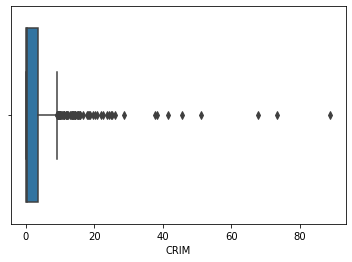

In [31]:
sns.boxplot(x=data['CRIM'])

<AxesSubplot:xlabel='ZN'>

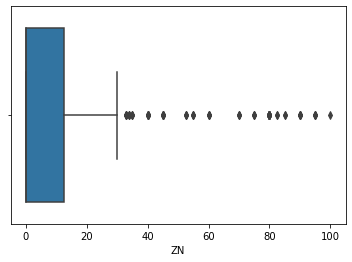

In [32]:
sns.boxplot(x=data['ZN'])

<AxesSubplot:xlabel='B'>

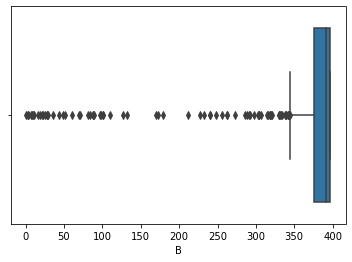

In [44]:
sns.boxplot(x=data['B'])

Значений, которые явно выбиваются из общей картины и которые можно отнести к выбросам, не наблюдаем. Считаем, что выбросов в датасете нет.

Обучаем модель линейной регрессии.

In [10]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [11]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train) 
# выведем скор модели тестовой выборки
model.score(X_test, y_test)

0.7112260057484903

Теперь создаём и обучаем модель на основе дерева решений.

In [16]:
from sklearn.tree import DecisionTreeRegressor 

In [27]:
treeRegressor = DecisionTreeRegressor(random_state=0) 
treeRegressor.fit(X_train, y_train)
treeRegressor.score(X_test, y_test)

0.7324772616611388

Даже для параметров по умолчанию скор модели на основе дерева решений уже выше, чем для линейной регрессии. Попробуем поиграться с параметрами:

In [29]:
treeRegressor = DecisionTreeRegressor(random_state=0, criterion='mae') 
treeRegressor.fit(X_train, y_train)
treeRegressor.score(X_test, y_test)

0.7952708864966476

Наблюдаем, что замена критерия разбиения с mse (среднеквадратичной ошибки) на mae (среднюю абсолютную ошибку) заметно увеличила точность работы модели.

In [34]:
treeRegressor = DecisionTreeRegressor(random_state=0, criterion='mae', min_samples_leaf=10) 
treeRegressor.fit(X_train, y_train)
treeRegressor.score(X_test, y_test)

0.8069184328806468

In [35]:
treeRegressor = DecisionTreeRegressor(random_state=0, criterion='mae', min_samples_leaf=5) 
treeRegressor.fit(X_train, y_train)
treeRegressor.score(X_test, y_test)

0.7873612030308305

Ограничение числа объектов в листе дерева (min_samples_leaf) сильно не влияет на точность предсказания, что логично, т. к. выбросов в исходном датасете у нас нет (по крайней мере, явных выбросов), таким образом, не должно происходить ситуаций попадания выбросов в отдельные листы дерева, что может привести к увеличению общей ошибки.

In [48]:
treeRegressor = DecisionTreeRegressor(random_state=0, criterion='mae', max_depth=9) 
treeRegressor.fit(X_train, y_train)
treeRegressor.score(X_test, y_test)

0.8510048638943256

Зато сильный буст к точности предсказания дало ограничение глубины дерева. Скорее всего, это обосновано как раз тем, что мы не даём экстремальным значениям признаков (max, min) сильно повлиять на общую ошибку.

#### Таким образом, мы обучили и исследовали работу регрессора на основе дерева решений и смогли получить заметно более лучший результат предсказания, чем для линейной модели.